In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv')
df.sample(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
188,874662,B,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,...,12.57,26.48,79.57,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576
481,91227,B,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
270,8910721,B,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,...,14.91,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
117,864729,M,14.87,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,...,18.81,27.37,127.10,1095.0,0.18780,0.44800,0.47040,0.20270,0.3585,0.10650
330,896839,M,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,...,18.76,21.98,124.30,1070.0,0.14350,0.44780,0.49560,0.19810,0.3019,0.09124
138,868826,M,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,...,18.55,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147
155,8711003,B,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,...,13.59,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132


In [2]:
x = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
scaler = StandardScaler()

y = encoder.fit_transform(y)
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [4]:
#k-NN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # k=5

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [5]:
y_predict = knn.predict(x_test)

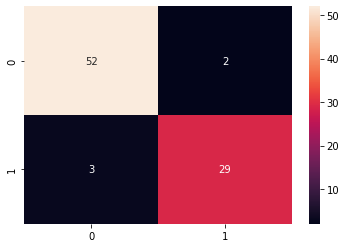

In [6]:
#Baholash

#Confusion matrix

from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True) #annot=True ichidagi raqamlarni chiqarish uchun
plt.show()

## Eng yaxshi k ni topamiz

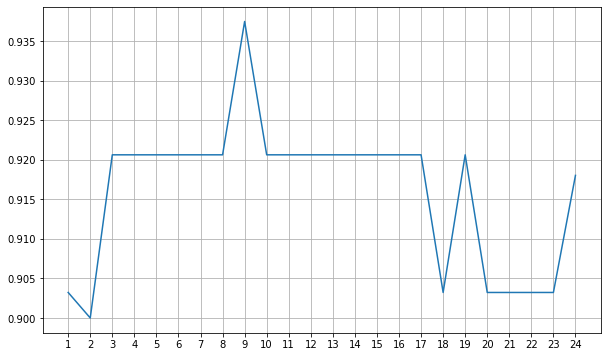

In [9]:
f1 = []
for k in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_predict = knn.predict(x_test)
  f = f1_score(y_test, y_predict)
  f1.append(f)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1)
plt.grid()
plt.xticks(range(1, 25))
plt.show()